In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("D:\\Tahir\IBM all Lab\\Machine learning\\hrdata.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Q1- Plot bar charts showing impact of employee salaries on retention

In [3]:
pd.crosstab(df.salary,df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='salary'>

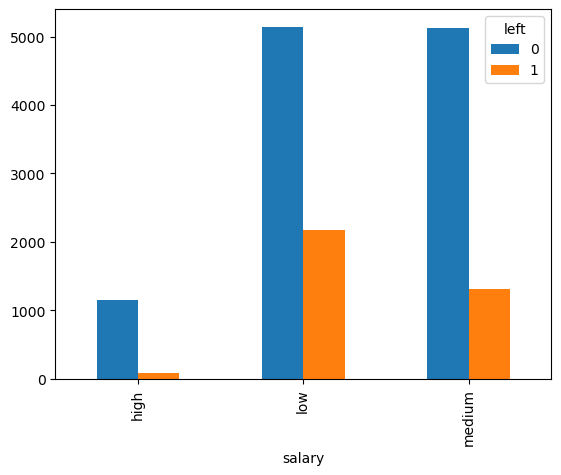

In [4]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

### Q2 - Plot bar charts showing corelation between department and employee retention

In [5]:
pd.crosstab(df.Department,df.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<AxesSubplot:xlabel='Department'>

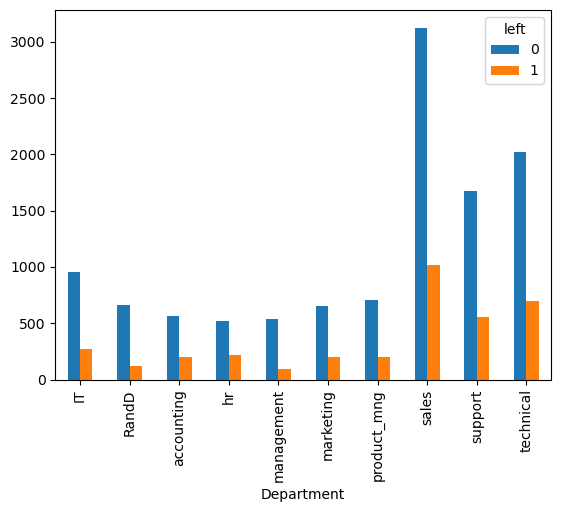

In [6]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

### Now build logistic regression model 

In [7]:
## we will use following variables as independant variables in our model
#Satisfaction Level
#Average Monthly Hours
#Promotion Last 5 Years
#Salary

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
x = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [10]:
dummies_salary = pd.get_dummies(df.salary)
dummies_salary                             

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [11]:
x = pd.concat([x,dummies_salary],axis="columns")

In [12]:
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [13]:
x.drop('salary',axis='columns',inplace=True)
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [14]:
y = df.left

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [17]:
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Q3 Measure the accuracy of the model

In [19]:
model.score(X_test,y_test)

0.7738333333333334